In [1]:
%load_ext blackcellmagic

# Project 1  
### The Moonshadow Elves  
* Hongmei Zeng  
* Noah Stettler  
* Patrick Harrington  
* Yacub Bholat  
  
Due: 18 January 2020  

In [114]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import api_keys

# globally matplotlib formatting
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 14})

In [3]:
#Import quandl zillow data
path = "https://www.quandl.com/api/v3/datasets/ZILLOW/C15_MVALFAH"

In [4]:
# Authenticate slipstream license
# documentation: https://slipstream.homejunction.com/#/ws/?id=authentication
path = "https://slipstream.homejunction.com/ws/api/authenticate"
payload = {
    "license": api_keys.slipstream_api_key
}
r = requests.get(path, params=payload)
r.status_code

200

In [5]:
# extract slipstream authentication token and create headers dict
# documentation: https://slipstream.homejunction.com/#/ws/?id=tokens
token = r.json()['result']['token']
headers = {
    "HJI-Slipstream-Token" : token
}

In [6]:
# get all zip codes in austin, tx and associated zip code attributes
# documentation: https://slipstream.homejunction.com/#/ws/areas/zipcodes?id=search
path = "https://slipstream.homejunction.com/ws/areas/zipcodes/search"
payload = {
    "county": "travis",
    "state": "tx",
    "details": "true",
    "geometry": "true",
    "pageSize": "1000"
}
r = requests.get(path, params=payload, headers=headers)
r.status_code

200

In [7]:
r.json()['result']

{'total': 50,
 'zipcodes': [{'geoType': 'area/zipcode',
   'id': 'd4bb86ba102ac1c968962df78bc2a697',
   'name': '78774',
   'areaType': 'zipcode',
   'type': 'zipcode',
   'label': '78774, Austin, TX',
   'place': {'name': 'Austin'},
   'county': {'id': '1ac3868c36cd18fae9b5b3300e6f5383', 'name': 'Travis'},
   'state': {'id': '37d24c232b3fe1cf979241517be67a54',
    'name': 'Texas',
    'abbreviation': 'TX'},
   'zipType': 'Unique',
   'centroid': {'latitude': 30.278134, 'longitude': -97.738329},
   'internalPoint': {'latitude': 30.2781311721144,
    'longitude': -97.738329950132},
   'population': {'current': 13,
    '1990': 13,
    '2000': 15,
    '2010': 12,
    'density': 2252.6},
   'gender': {'male': 57.71, 'female': 42.29},
   'age': {'median': 32,
    'male': 34.3,
    'female': 27.8,
    'white': 33.8,
    'black': 42.9,
    'asian': 23.1,
    'hispanic': 25.8,
    'Y0_5': 1.71,
    'Y6_11': 1.99,
    'Y12_17': 1.42,
    'Y18_24': 31.84,
    'Y25_34': 18.76,
    'Y35_44': 11.58

In [100]:
# get zip code coord data
# n = {zipcode['name'] : zipcode['geometry']['coordinates'] for zipcode in r.json()['result']['zipcodes']} # zip codes and lat/long data
zip_list = [int(zipcode['name']) for zipcode in r.json()['result']['zipcodes']] # only zip codes
zip_list = pd.Series(zip_list)
zip_list.name = "ZipCode"
zip_list

0     78774
1     78755
2     78758
3     78669
4     78744
5     78736
6     78738
7     78719
8     78726
9     78653
10    78710
11    78733
12    78753
13    78722
14    78742
15    78725
16    78617
17    78732
18    78748
19    78705
20    78703
21    78756
22    78730
23    78728
24    78754
25    78735
26    78741
27    78731
28    78723
29    78724
30    78712
31    78645
32    78701
33    78751
34    78660
35    78734
36    78747
37    78727
38    78759
39    78750
40    78752
41    78745
42    78652
43    78704
44    78721
45    78739
46    78749
47    78746
48    78702
49    78757
Name: ZipCode, dtype: int64

In [115]:
zillow_sale_price_csv = os.path.join("Data", "Sale_Prices_Zip.csv")
zillow_df = pd.read_csv(zillow_sale_price_csv)\
    .drop(columns=["RegionID", "StateName", "SizeRank"])\
    .rename(columns={
        "RegionName": "ZipCode"
})
zillow_df = pd.merge(zillow_df, zip_list, how="inner", on="ZipCode")
zillow_df

,ZipCode,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,78660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251700.0,254000.0,258600.0,255000.0,255800.0,254000.0,258500.0,257000.0,261200.0,NaN
1,78704,304400.0,295100.0,275700.0,283300.0,284400.0,274900.0,280800.0,272800.0,260300.0,...,522400.0,540400.0,557800.0,548700.0,539000.0,552900.0,590200.0,565500.0,566900.0,NaN
2,78745,168200.0,164300.0,163500.0,165400.0,169000.0,174100.0,173600.0,176300.0,176600.0,...,324200.0,322500.0,320800.0,322000.0,322200.0,328300.0,341200.0,342000.0,347700.0,NaN
3,78748,177600.0,171000.0,175600.0,172900.0,175300.0,173100.0,173700.0,177400.0,177300.0,...,293500.0,293900.0,287000.0,296900.0,298300.0,300200.0,297700.0,297600.0,306500.0,NaN
4,78758,132300.0,131200.0,129300.0,134000.0,138600.0,132200.0,128300.0,135000.0,132200.0,...,266100.0,287300.0,287900.0,287400.0,288200.0,281400.0,283900.0,281600.0,311200.0,NaN
5,78753,134800.0,130600.0,124300.0,123600.0,126100.0,130700.0,136700.0,136600.0,134400.0,...,259900.0,256000.0,249800.0,234500.0,243000.0,247700.0,251600.0,258100.0,267700.0,NaN
6,78759,267600.0,274500.0,266600.0,262400.0,267700.0,250200.0,250200.0,255000.0,287900.0,...,420600.0,424700.0,454800.0,467400.0,463100.0,449100.0,474300.0,464200.0,467700.0,NaN
7,78744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,241300.0,239300.0,240300.0,231900.0,230400.0,233300.0,237900.0,243400.0,245700.0,NaN
8,78723,189000.0,200000.0,191000.0,178400.0,185500.0,195900.0,195700.0,168000.0,179200.0,...,366200.0,358900.0,365500.0,372500.0,379500.0,377100.0,408800.0,409500.0,414600.0,NaN
9,78749,228300.0,226700.0,230400.0,228900.0,231700.0,233400.0,231600.0,229100.0,224100.0,...,373500.0,367500.0,380000.0,376000.0,381700.0,387500.0,398700.0,395100.0,382300.0,NaN


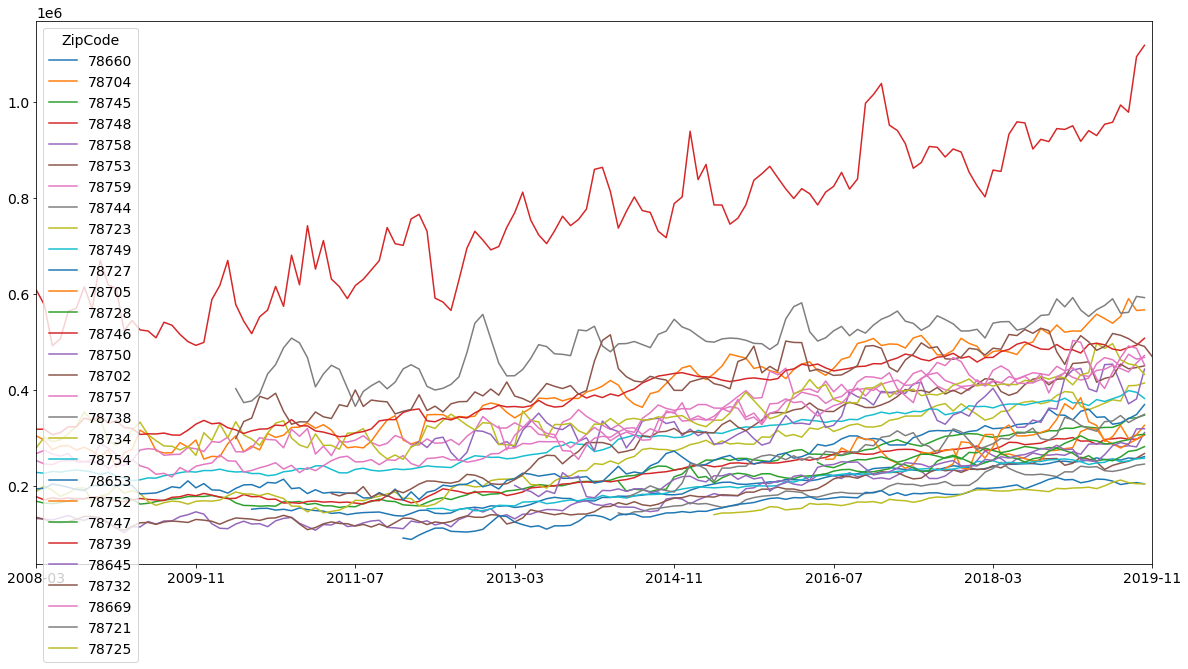

In [116]:
zillow_df.set_index("ZipCode").transpose().plot()

# YACUB CODE

# PATRICK CODE

# HONGMEI CODE

# NOAH CODE